In [95]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

In [138]:
growth_df = pd.read_csv("../Data/Growth_data/Cross_tolerance/Cleaned_growth_rates.tsv", sep="\t")
growth_df = growth_df[~growth_df["evolved_compound"].isin(("butanol", "1,2-propanediol"))]
growth_df = growth_df[~growth_df["grown_compound"].isin(("butanol", "1,2-propanediol"))]
m9_df = pd.read_csv("../Data/Growth_data/M9/M9_normalised_growth.csv")

In [139]:
growth_df

,evolved_compound,grown_compound,tray,strain,repl,growth_rate,tOD1,exp_name,well,rel_growth_rate,growth_ratio
75,NaN,glutarate,2,MG1655,1,0.184444,24.25,hexanoate_plate1_041715,A1,-0.000163,0.999115
76,hexanoate,glutarate,2,HEXA1-4,1,0.129924,NaN,hexanoate_plate1_041715,A2,-0.054683,0.703786
77,NaN,glutarate,2,MG1655,2,0.183865,23.50,hexanoate_plate1_041715,B1,-0.000743,0.995976
78,hexanoate,glutarate,2,HEXA1-4,2,0.090814,NaN,hexanoate_plate1_041715,B2,-0.093793,0.491932
79,hexanoate,glutarate,2,HEXA2-3,3,0.110487,NaN,hexanoate_plate1_041715,B3,-0.074120,0.598499
80,hexanoate,glutarate,2,HEXA3-1,1,0.059280,35.50,hexanoate_plate1_041715,B4,-0.125327,0.321115
81,hexanoate,glutarate,2,HEXA3-9,2,0.060977,NaN,hexanoate_plate1_041715,B5,-0.123630,0.330307
82,hexanoate,glutarate,2,HEXA4-7,3,0.180719,22.00,hexanoate_plate1_041715,B6,-0.003889,0.978935
83,hexanoate,glutarate,2,HEXA5-8,1,0.202986,23.00,hexanoate_plate1_041715,B7,0.018378,1.099554
84,hexanoate,glutarate,2,HEXA6-4,2,0.192209,25.00,hexanoate_plate1_041715,B8,0.007602,1.041178


In [144]:
df = growth_df.groupby(["strain", "grown_compound"]).mean().reset_index().pivot("strain", "grown_compound", "rel_growth_rate")
df["M9"] = m9_df.groupby("strain").mean()["rel_growth_rate"]
df = df[df["M9"].notnull()]
df = df[["2,3-butanediol", "HMDA", "putrescine", "adipate", "glutarate", "hexanoate", "octanoate", "isobutyrate", "coumarate", "NaCl", "M9"]]
raw_df = df.copy()
# df = (df.transpose() - df["M9"]).transpose()
# df["M9"] = raw_df["M9"]

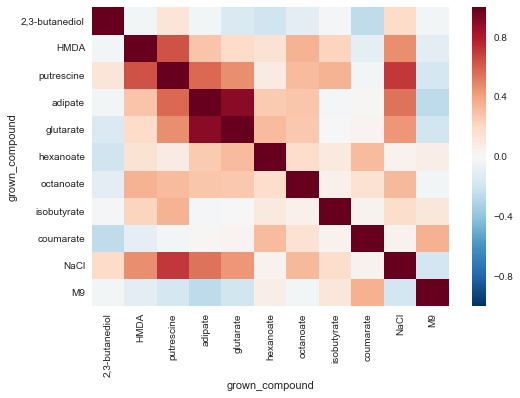

In [145]:
sbn.heatmap(df.corr())

In [151]:
df[df.index.str.startswith("GLUT")].corr()

grown_compound,"2,3-butanediol",HMDA,putrescine,adipate,glutarate,hexanoate,octanoate,isobutyrate,coumarate,NaCl,M9
grown_compound,,,,,,,,,,,
"2,3-butanediol",1.000000,-0.471895,0.453351,0.559467,0.352096,0.096074,-0.096568,0.417284,0.057048,0.492058,0.295846
HMDA,-0.471895,1.000000,-0.516273,-0.272454,0.094792,0.138604,-0.063850,-0.672329,-0.366287,-0.697172,0.017202
putrescine,0.453351,-0.516273,1.000000,0.549045,0.022020,-0.422359,-0.437490,0.589425,0.328774,0.804538,0.082739
adipate,0.559467,-0.272454,0.549045,1.000000,0.689431,0.060725,-0.312316,0.541355,0.260324,0.595204,0.723489
glutarate,0.352096,0.094792,0.022020,0.689431,1.000000,0.510973,-0.252508,0.295160,-0.080802,0.186266,0.537468
hexanoate,0.096074,0.138604,-0.422359,0.060725,0.510973,1.000000,0.063400,-0.002200,0.054345,-0.216207,0.335304
octanoate,-0.096568,-0.063850,-0.437490,-0.312316,-0.252508,0.063400,1.000000,-0.352851,0.290118,-0.376509,0.040142
isobutyrate,0.417284,-0.672329,0.589425,0.541355,0.295160,-0.002200,-0.352851,1.000000,0.088724,0.792733,0.076406
coumarate,0.057048,-0.366287,0.328774,0.260324,-0.080802,0.054345,0.290118,0.088724,1.000000,0.328911,0.388020


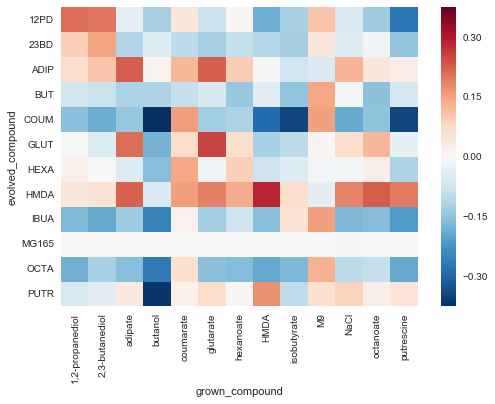

In [83]:
plot_df = df.copy()
plot_df["evolved_compound"] = plot_df.index.map(lambda x: x.split("-")[0][:-1])
plot_df = plot_df.groupby("evolved_compound").mean()
plot_df = plot_df[list(sorted(plot_df.columns, key=lambda x: x.lower()))]
sbn.heatmap((plot_df))

In [84]:
df.corr()

grown_compound,"1,2-propanediol","2,3-butanediol",HMDA,NaCl,adipate,butanol,coumarate,glutarate,hexanoate,isobutyrate,octanoate,putrescine,M9
grown_compound,,,,,,,,,,,,,
"1,2-propanediol",1.000000,0.811664,0.320692,0.525171,0.529443,0.428734,0.143856,0.444354,0.455208,0.382830,0.323057,0.345646,-0.582717
"2,3-butanediol",0.811664,1.000000,0.296198,0.540987,0.479303,0.499261,0.093736,0.357151,0.356566,0.362002,0.272543,0.376236,-0.588604
HMDA,0.320692,0.296198,1.000000,0.690530,0.571783,0.243724,0.160150,0.536566,0.438500,0.481375,0.547635,0.786297,-0.588285
NaCl,0.525171,0.540987,0.690530,1.000000,0.790977,0.391796,0.301721,0.745268,0.501518,0.539302,0.601740,0.840559,-0.752378
adipate,0.529443,0.479303,0.571783,0.790977,1.000000,0.333985,0.371328,0.945851,0.655635,0.466944,0.606842,0.748175,-0.776939
butanol,0.428734,0.499261,0.243724,0.391796,0.333985,1.000000,0.126098,0.288253,0.262108,0.367035,0.214901,0.307680,-0.408524
coumarate,0.143856,0.093736,0.160150,0.301721,0.371328,0.126098,1.000000,0.321674,0.456077,0.186916,0.415165,0.259691,-0.375868
glutarate,0.444354,0.357151,0.536566,0.745268,0.945851,0.288253,0.321674,1.000000,0.634613,0.447651,0.596029,0.724040,-0.732275
hexanoate,0.455208,0.356566,0.438500,0.501518,0.655635,0.262108,0.456077,0.634613,1.000000,0.425361,0.502112,0.458220,-0.653060


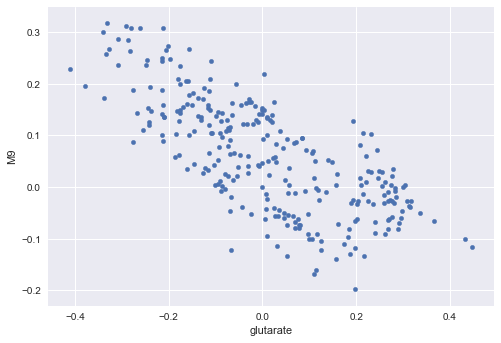

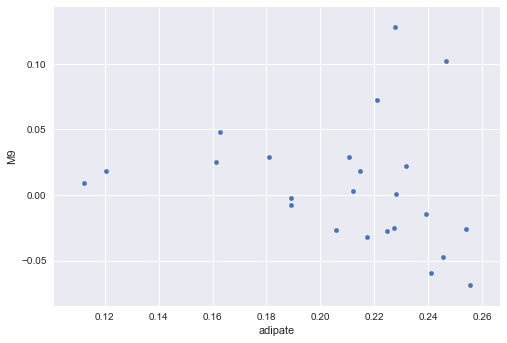

In [91]:
df.plot(kind="scatter", x="glutarate", y="M9")
df[df.index.str.startswith("GLUT")].plot(kind="scatter", x="adipate", y="M9")

In [127]:
A = np.random.normal(scale=10, size=[2, 100])

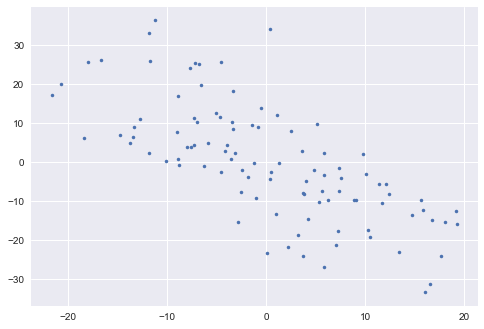

In [128]:
plt.plot(A[0], A[1]-A[0], ".")

In [120]:
np.corrcoef(A[0], A[1]-A[0])

array([[ 1.        , -0.70409919],
       [-0.70409919,  1.        ]])